# Traffic Sign Recognition System

**Importing Modules**

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

**Stoare Data, Label in the List**

In [4]:
data = []
labels = []


classes = 43

cur_path = os.getcwd()
print("Current Working Directory is : " + cur_path)


Current Working Directory is : C:\Users\GAURAV\Desktop\Trafic sign Project


**Preprocessing Image**

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

**Converting List into a Numpy Array**

In [6]:
data = np.array(data)
labels = np.array(labels)

**Save Labels and Data for further use**

In [7]:
#os.mkdir('trained')

np.save('./trained/data',data)
np.save('./trained/target',labels)

**Load Data and Labels**

In [8]:
data = np.load('./trained/data.npy')
labels = np.load('./trained/target.npy')

In [9]:
print('Shape of Image Data: ' + str(data.shape))
print('Shape of Labels Data: ' + str(labels.shape))

Shape of Image Data: (39209, 30, 30, 3)
Shape of Labels Data: (39209,)


*We can see that the shape of Image data and Labels is same*

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)
print('20% Data is used as testing data')
print('Train Test Split Complete!!!')

20% Data is used as testing data
Train Test Split Complete!!!


In [11]:
print('Training sample sape for Image Data: ' + str(x_train.shape))
print('Testing sample sape for Image Data: ' + str(x_test.shape))
print('Training sample sape for Labels Data: ' + str(y_train.shape))
print('Testing sample sape for Labels Data: ' + str(y_test.shape))

Training sample sape for Image Data: (31367, 30, 30, 3)
Testing sample sape for Image Data: (7842, 30, 30, 3)
Training sample sape for Labels Data: (31367,)
Testing sample sape for Labels Data: (7842,)


**Convert Labels to onehot Encoding**

In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

**Building Model**

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

print('Model Succesfully Developed !!!!')

Model Succesfully Developed !!!!


**Compilation of Model**

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
epochs = 20
history = model.fit(x_train,y_train,batch_size = 32, epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/20
981/981 [==============================] - 181s 182ms/step - loss: 2.1162 - accuracy: 0.4445 - val_loss: 0.6480 - val_accuracy: 0.8069
Epoch 2/20
981/981 [==============================] - 171s 174ms/step - loss: 0.9377 - accuracy: 0.7202 - val_loss: 0.4888 - val_accuracy: 0.8596
Epoch 3/20
981/981 [==============================] - 164s 167ms/step - loss: 0.7243 - accuracy: 0.7824 - val_loss: 0.2884 - val_accuracy: 0.9121
Epoch 4/20
981/981 [==============================] - 170s 173ms/step - loss: 0.6138 - accuracy: 0.8152 - val_loss: 0.2163 - val_accuracy: 0.9370
Epoch 5/20
981/981 [==============================] - 175s 179ms/step - loss: 0.5761 - accuracy: 0.8270 - val_loss: 0.2412 - val_accuracy: 0.9294
Epoch 6/20
981/981 [==============================] - 172s 175ms/step - loss: 0.5261 - accuracy: 0.8437 - val_loss: 0.1949 - val_accuracy: 0.9438
Epoch 7/20
981/981 [==============================] - 164s 167ms/step - loss: 0.4863 - accuracy: 0.8535 - val_loss: 0.1525 -

**Accuracy**

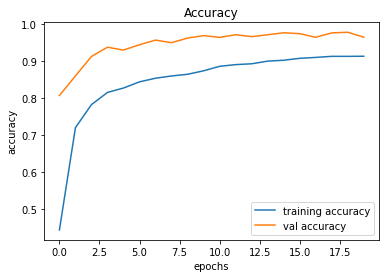

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Here what we can observe is that for 20 Epochs 

*Accuracy is 0.9422*

*Validation Accuracy is 0.9843*

**Loss**

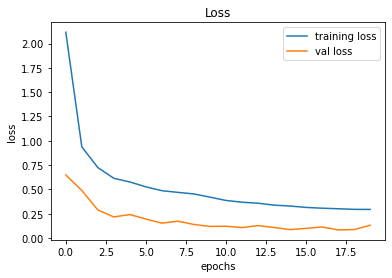

In [17]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

So we can observe that 

*Feature loss is 0.2349*

*Validation loss is 0.0572*

**Testing**

In [18]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    x_test=np.array(data)
    return x_test,label

In [19]:
x_test, label = testing('Test.csv')

In [24]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred

array([12, 13, 31, ..., 26,  7,  4], dtype=int64)

**Accuracy With Test Data**

In [29]:
from sklearn.metrics import accuracy_score

In [31]:
model.save("./trained/TSR.h5")

**Loading the model**

In [33]:
from keras.models import load_model
model = load_model('./trained/TSR.h5')

*Classes of Traffic Signs*

This classes are labeled on the basis of available train data

In [34]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    x_test=np.array(data)
    y_pred = np.argmax(model.predict(x_test), axis=-1)
    return image,y_pred

Predicted traffic sign is:  Speed limit (70km/h)


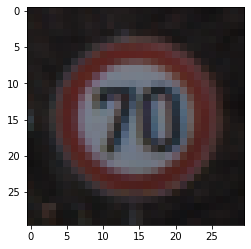

In [40]:
plot,prediction = test_on_img(r'C:\Users\GAURAV\Desktop\Trafic sign Project\Test\00062.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

### **hurreyyyy, Completed !**